In [174]:
import pandas as pd
import numpy as np
audata = pd.read_csv("RESULT_new3/pb/pb2107_pb2108_final.csv", index_col=[0], parse_dates=[0])
audata['trading_date'] = pd.to_datetime(audata['trading_date'])
audata

,id_A,ask_A,ask_vol_A,bid_A,bid_vol_A,last_A,id_B,ask_B,ask_vol_B,bid_B,bid_vol_B,last_B,spd_ask,spd_bid,spd_last,trading_date
date_time,,,,,,,,,,,,,,,,
2020-08-17 20:59:00.500,pb2107,0.0,0.0,0.0,0.0,15780.0,pb2108,17770.0,3.0,14025.0,3.0,15780.0,-14025.0,-17770.0,0.0,2020-08-18
2020-08-17 21:00:08.500,pb2107,17010.0,1.0,14535.0,4.0,15780.0,pb2108,17760.0,2.0,14035.0,2.0,15780.0,500.0,-750.0,0.0,2020-08-18
2020-08-17 21:00:16.500,pb2107,16990.0,2.0,14565.0,2.0,15780.0,pb2108,17740.0,2.0,14060.0,1.0,15780.0,505.0,-750.0,0.0,2020-08-18
2020-08-17 21:00:24.000,pb2107,16955.0,1.0,14600.0,1.0,15780.0,pb2108,17715.0,3.0,14080.0,1.0,15780.0,520.0,-760.0,0.0,2020-08-18
2020-08-17 21:00:31.500,pb2107,16055.0,1.0,15490.0,1.0,15780.0,pb2108,17690.0,1.0,14105.0,2.0,15780.0,1385.0,-1635.0,0.0,2020-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 14:59:28.500,pb2107,15250.0,19.0,15240.0,39.0,15245.0,pb2108,15320.0,4.0,15315.0,10.0,15320.0,-75.0,-70.0,-75.0,2021-05-25
2021-05-25 14:59:39.500,pb2107,15245.0,6.0,15240.0,1.0,15240.0,pb2108,15310.0,1.0,15305.0,44.0,15315.0,-65.0,-65.0,-75.0,2021-05-25
2021-05-25 14:59:45.500,pb2107,15245.0,8.0,15235.0,1.0,15230.0,pb2108,15310.0,10.0,15305.0,44.0,15310.0,-70.0,-65.0,-80.0,2021-05-25


In [175]:
import datetime
start_date = datetime.datetime(2021, 4, 15)
end_date = datetime.datetime(2021, 5, 25)
data_all = audata.loc[audata.trading_date >= start_date]
data_all = data_all.loc[data_all.trading_date <= end_date]

#删除为0的行，排除涨跌停导致价格为0
data_all.drop( index = data_all.ask_A[data_all.ask_A == 0].index,inplace = True)
data_all.drop( index = data_all.bid_A[data_all.bid_A == 0].index,inplace = True)
data_all.drop( index = data_all.ask_B[data_all.ask_B == 0].index,inplace = True)
data_all.drop( index = data_all.bid_B[data_all.bid_B == 0].index,inplace = True)

#获取到交易日，后面根据交易日做循环
pd_date_list = pd.DataFrame()
pd_date_list['time_stamp'] = data_all['trading_date']
# normalize, count values, convert to dataframe
pd_date_list = pd_date_list['time_stamp'].dt.normalize().value_counts().to_frame().reset_index()
# rename columns
pd_date_list.columns = ['time_stamp', 'count']
pd_date_list.sort_values(by='time_stamp',inplace=True)
pd_date_list = pd_date_list.reset_index()
pd_date_list.drop(columns='index',inplace=True)
pd_date_list


,time_stamp,count
0,2021-04-15,594
1,2021-04-16,685
2,2021-04-19,824
3,2021-04-20,747
4,2021-04-21,765
5,2021-04-22,822
6,2021-04-23,951
7,2021-04-26,913
8,2021-04-27,845
9,2021-04-28,924


In [176]:
import statsmodels.api as sm
import datetime
holding = False
direction = None  # "a-b", "b-a"
stop_event = "none"
enter_record = []
out_record = []
trading_date_in = ""

pure_pnl = []
trading_cost = []
pnl = []
cost_rate = 0.4 / 10000
delta_days = 1
K = 0
beta = 0
# data_all['trading_date']  =  pd.to_datetime(data_all['trading_date']) #处理交易日时刻
#取最近5天数据
for date_index in range(0,len(pd_date_list) - delta_days):

    #根据日期获取拟合数据
    start_time = pd_date_list['time_stamp'].iloc[date_index]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]
    #使用数据的成交价拟合beta
    model = sm.OLS(data.last_A, data.last_B).fit()
    beta = model.params['last_B']
    eps = data.last_A - data.last_B * beta #生成拟合后数据

    #根据日期获取交易数据       
    start_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]  + pd.Timedelta("1 day")
    test_data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

    #根据beta生产对手价的ask和bid序列
    eps2_ask = test_data.bid_A - test_data.ask_B * beta
    eps2_bid = test_data.ask_A - test_data.bid_B * beta
    #生成实际的成交的ask和bid价格（由于实际交易都是1:1）
    Spread2_ask = test_data.bid_A - test_data.ask_B
    Spread2_bid = test_data.ask_A - test_data.bid_B

    print(" ")
    print('test_day:',start_time)
    print(model.params)

    #进入交易
    #生成交易信号阈值
    # K = 0.55
    # up_threshold =  K * np.std(eps)
    up_threshold = 4
    down_threshold = - up_threshold

    #生成止损信号阈值
    up_threshold_stop = np.std(eps) * 20
    down_threshold_stop = -up_threshold_stop
    #生成最大亏损信号阈值
    biggest_lost = -100

    #生成平仓信号阈值
    up_close_threshold = up_threshold - 5
    down_close_threshold = down_threshold + 5

    print('beta:',beta)
    print('阈值：',up_threshold)
    print('止损点：',up_threshold_stop)

    #遍历数据判断交易
    for i, v in enumerate(eps2_ask.values):
        #交易时间点判断:去除开盘前10分钟和收盘前十分钟
        start_time1 = datetime.time(21,10,0) #夜盘开盘
        start_time2 = datetime.time(9,10,0) #早上开盘

        end_time1 = datetime.time(0,50,0) #夜盘收盘
        end_time2 = datetime.time(14,50,0) #下午收盘
        #判断是否在我们规定交易时段
        if (eps2_ask.index[i].time() > start_time1 or eps2_ask.index[i].time() < end_time1) or \
            (eps2_ask.index[i].time() > start_time2 and eps2_ask.index[i].time() < end_time2):

            ask_price = eps2_ask[i] #获取价格
            bid_price = eps2_bid[i]
            if not holding:
                # 判断进场条件
                if ask_price > up_threshold and stop_event != 'up_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'b-a'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'b-a进场', Spread2_ask[i], ask_price,'--',len(enter_record))
                    #记录进出场信息
                    enter_record.append((Spread2_ask[i], ask_price,test_data.index[i],direction))
                elif bid_price < down_threshold and stop_event != 'down_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'a-b'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'a-b进场', Spread2_bid[i], bid_price,'--',len(enter_record))
                    enter_record.append((Spread2_bid[i], bid_price,test_data.index[i],direction))
                    
            elif holding:
                # 判断离场条件
                if direction == 'a-b' and ask_price > down_close_threshold:
                    holding = False
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price < up_close_threshold:
                    holding = False
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2       
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'b-a出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)

                #判断止损条件
                elif direction == 'a-b' and ask_price < down_threshold_stop:
                    holding = False
                    stop_event = 'down_stop'               
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price > up_threshold_stop:
                    holding = False
                    stop_event = 'up_stop'
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2        
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    print(test_data.index[i],'b-a止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                    out_record.append(( Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                else: #判断最大亏损有没有达到阈值
                    if direction == 'a-b':
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'down_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'a-b收益止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                            out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    elif direction =='b-a':
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'up_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2         
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'b-a收益止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                            out_record.append((Spread2_bid[i], bid_price, test_data.index[i],single_ret,single_cost))

            
if holding:
    if direction == 'a-b':
        single_ret = (Spread2_ask[i-10] - enter_record[-1][0])
    else:
        single_ret = (enter_record[-1][0] - Spread2_bid[i-10])
    
    if trading_date_in == test_data.trading_date[i-10]:
        single_cost = cost_rate * (test_data.last_A[i-10] + test_data.last_B[i-10])
    else:
        single_cost = cost_rate * (test_data.last_A[i-10] + test_data.last_B[i-10]) * 2 
    pure_pnl.append(single_ret)
    trading_cost.append(single_cost)
    pnl.append(single_ret - single_cost)

    out_record.append((Spread2_ask[i-10], eps2_ask[i-10], test_data.index[i-10],single_ret,single_cost))
    print('还有持仓，强平',Spread2_ask[i-10], eps2_ask[i-10],'ret:',single_ret - single_cost)

#做汇总处理，生成交易日志和结果。
df_record = pd.DataFrame()
index_list = []
direction_list = []
in_out_price = []
in_out_eps_price = []
ret_list = []
cost_list = []
pure_ret_list = []
for j in range(0,len(enter_record)):
    #更新index
    index_list.append(enter_record[j][2])
    index_list.append(out_record[j][2])
    #更新方向：
    direction_list.append(enter_record[j][3] + ' in')
    direction_list.append(enter_record[j][3] + ' out')
    #更新进出场价格-原始和eps
    in_out_price.append(enter_record[j][0])
    in_out_price.append(out_record[j][0])

    in_out_eps_price.append(enter_record[j][1])
    in_out_eps_price.append(out_record[j][1])

    #更新成本和收益
    pure_ret_list.append(0) #进场为0
    pure_ret_list.append(out_record[j][3]) #出场记录

    cost_list.append(0) #进场为0
    cost_list.append(out_record[j][4]) #出场记录

    ret_list.append(0) #进场为0
    ret_list.append(out_record[j][3] - out_record[j][4]) #出场记录

#转换为datafram
df_record = data_all.loc[index_list]
df_record['trading_direction'] = direction_list
df_record['in_out_price'] = in_out_price
df_record['in_out_eps_price'] = in_out_eps_price
df_record['pure_return'] = pure_ret_list
df_record['trading cost'] = cost_list
df_record['final return'] = ret_list


 
test_day: 2021-04-16 00:00:00
last_B    0.99823
dtype: float64
beta: 0.9982303932653928
阈值： 4
止损点： 324.31308349831914
2021-04-15 21:43:46.500000 a-b进场 -35.0 -8.34087454314249 -- 0
2021-04-15 23:03:00.500000 a-b出场 -25.0 1.7210616925694922 ret: 8.7932
2021-04-16 14:24:45 a-b进场 -35.0 -8.181609937028043 -- 1
2021-04-16 14:34:07.500000 a-b出场 -25.0 1.800693995626716 ret: 8.7892
 
test_day: 2021-04-19 00:00:00
last_B    0.998211
dtype: float64
beta: 0.9982111769035272
阈值： 4
止损点： 242.77423501838183
2021-04-19 14:00:31.500000 a-b进场 -35.0 -7.738336009755585 -- 2
 
test_day: 2021-04-20 00:00:00
last_B    0.997815
dtype: float64
beta: 0.9978153703235226
阈值： 4
止损点： 261.461004351575
2021-04-19 21:39:29.500000 a-b出场 -25.0 8.49037294039772 ret: 7.5492
2021-04-20 14:41:45.500000 b-a进场 -25.0 8.676066462898234 -- 3
 
test_day: 2021-04-21 00:00:00
last_B    0.998077
dtype: float64
beta: 0.9980771858120068
阈值： 4
止损点： 318.6276932522219
 
test_day: 2021-04-22 00:00:00
last_B    0.998388
dtype: float64
beta

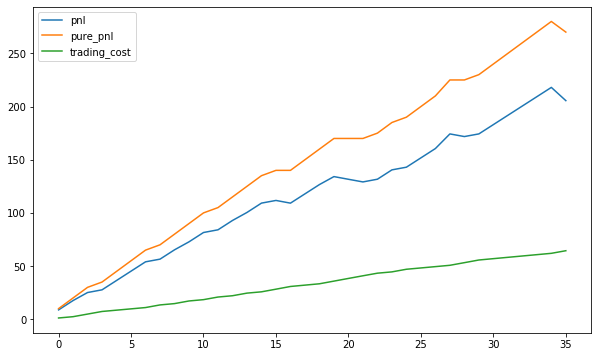

205.55919999999998

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(np.array(pnl).cumsum(), label='pnl')
plt.plot(np.array(pure_pnl).cumsum(), label='pure_pnl')
plt.plot(np.array(trading_cost).cumsum(), label='trading_cost')
plt.savefig(os.path.join(trading_result_path, "trading_result.jpg"))
plt.legend()
plt.show()
np.array(pnl).sum()

In [178]:
trading_result_path = "RESULT_CU/traidng_result_pb"
if not os.path.exists(trading_result_path):
    os.mkdir(trading_result_path)
df_record.to_csv(os.path.join(trading_result_path, "_trading_result.csv"), encoding="utf_8_sig")


                           id_A    ask_A  ask_vol_A    bid_A  bid_vol_A  \
date_time                                                                 
2021-05-24 21:00:02.000  pb2107  15335.0        2.0  15330.0       39.0   
2021-05-24 21:00:05.500  pb2107  15330.0        2.0  15325.0       36.0   
2021-05-24 21:00:15.000  pb2107  15325.0        9.0  15320.0       12.0   
2021-05-24 21:00:23.000  pb2107  15325.0        4.0  15320.0       12.0   
2021-05-24 21:00:28.000  pb2107  15335.0       21.0  15330.0       10.0   
...                         ...      ...        ...      ...        ...   
2021-05-25 14:59:28.500  pb2107  15250.0       19.0  15240.0       39.0   
2021-05-25 14:59:39.500  pb2107  15245.0        6.0  15240.0        1.0   
2021-05-25 14:59:45.500  pb2107  15245.0        8.0  15235.0        1.0   
2021-05-25 14:59:51.000  pb2107  15245.0        2.0  15240.0       11.0   
2021-05-25 14:59:59.500  pb2107  15255.0       26.0  15235.0        2.0   

                        

In [ ]:
start_time = pd_date_list['time_stamp'].iloc[-1]
end_time = pd_date_list['time_stamp'].iloc[-1] + pd.Timedelta("1 day")
data = data_all[(data_all.trading_date >= start_time) & (data_all.trading_date < end_time)]

model = sm.OLS(data.last_A, data.last_B).fit()
print(data)
print(model.params)

beta = model.params['last_B']

eps = data.last_A - data.last_B * beta

Spread = data.last_A - data.last_B

#进入交易

K = 0.55
up_threshold =  K * np.std(eps)
down_threshold = - up_threshold
print(up_threshold)
print(beta)